# **Importing the libraries**

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.layers import LSTM, Dense, Dropout





from sklearn.metrics import recall_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier






In [ ]:
#Mounting gogle drive containing the dataset

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Loading the dataset

phishing_data = pd.read_csv('/content/gdrive/MyDrive/Thesis Dataset.csv')

In [ ]:

#Creating a copy of the data

df = phishing_data.copy()

## **Exploratory Data Analysis**

In [ ]:
df.head()

,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,...,having_repeated_digits_in_domain,average_subdomain_length,having_digits_in_subdomain,number_of_digits_in_subdomain,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain,label
0,37,2,0,0,8,0,0,5,0,0,...,0,3.0,0,0,0,0,0,4.010412,2.751629,0
1,70,5,0,0,12,0,0,6,0,0,...,0,3.0,0,0,0,0,0,4.089470,3.532573,1
2,42,2,0,6,8,0,0,3,1,1,...,0,7.0,0,0,1,0,0,4.386016,3.344698,0
3,46,2,0,0,7,0,0,4,0,0,...,0,3.0,0,0,0,0,0,4.221947,3.189898,0
4,51,3,0,0,9,0,0,5,0,0,...,0,3.0,0,0,0,0,0,4.103538,2.952820,0


In [ ]:
df.tail()

,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,...,having_repeated_digits_in_domain,average_subdomain_length,having_digits_in_subdomain,number_of_digits_in_subdomain,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain,label
247945,42,1,0,0,6,0,0,4,0,0,...,0,11.0,0,0,0,0,0,3.758289,3.323231,0
247946,42,2,0,0,8,0,0,5,0,0,...,0,3.0,0,0,0,0,0,3.937093,3.026987,0
247947,33,2,0,0,8,0,0,5,0,0,...,0,2.0,0,0,0,0,0,3.813207,3.327820,1
247948,83,1,1,19,9,0,0,7,0,0,...,0,13.0,0,0,0,0,0,4.540173,3.375000,1
247949,34,3,0,0,7,0,0,3,0,0,...,0,3.0,0,0,0,0,0,4.035274,3.182006,0


In [ ]:
df.shape

(247950, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247950 entries, 0 to 247949
Data columns (total 30 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   url_length                        247950 non-null  int64  
 1   number_of_dots_in_url             247950 non-null  int64  
 2   having_repeated_digits_in_url     247950 non-null  int64  
 3   number_of_digits_in_url           247950 non-null  int64  
 4   number_of_special_char_in_url     247950 non-null  int64  
 5   number_of_hyphens_in_url          247950 non-null  int64  
 6   number_of_underline_in_url        247950 non-null  int64  
 7   number_of_slash_in_url            247950 non-null  int64  
 8   number_of_questionmark_in_url     247950 non-null  int64  
 9   number_of_equal_in_url            247950 non-null  int64  
 10  number_of_at_in_url               247950 non-null  int64  
 11  number_of_dollar_in_url           247950 non-null  i

In [ ]:
df.head()

,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,...,having_repeated_digits_in_domain,average_subdomain_length,having_digits_in_subdomain,number_of_digits_in_subdomain,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain,label
0,37,2,0,0,8,0,0,5,0,0,...,0,3.0,0,0,0,0,0,4.010412,2.751629,0
1,70,5,0,0,12,0,0,6,0,0,...,0,3.0,0,0,0,0,0,4.089470,3.532573,1
2,42,2,0,6,8,0,0,3,1,1,...,0,7.0,0,0,1,0,0,4.386016,3.344698,0
3,46,2,0,0,7,0,0,4,0,0,...,0,3.0,0,0,0,0,0,4.221947,3.189898,0
4,51,3,0,0,9,0,0,5,0,0,...,0,3.0,0,0,0,0,0,4.103538,2.952820,0


In [ ]:
df.tail()

,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,...,having_repeated_digits_in_domain,average_subdomain_length,having_digits_in_subdomain,number_of_digits_in_subdomain,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain,label
247945,42,1,0,0,6,0,0,4,0,0,...,0,11.0,0,0,0,0,0,3.758289,3.323231,0
247946,42,2,0,0,8,0,0,5,0,0,...,0,3.0,0,0,0,0,0,3.937093,3.026987,0
247947,33,2,0,0,8,0,0,5,0,0,...,0,2.0,0,0,0,0,0,3.813207,3.327820,1
247948,83,1,1,19,9,0,0,7,0,0,...,0,13.0,0,0,0,0,0,4.540173,3.375000,1
247949,34,3,0,0,7,0,0,3,0,0,...,0,3.0,0,0,0,0,0,4.035274,3.182006,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247950 entries, 0 to 247949
Data columns (total 30 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   url_length                        247950 non-null  int64  
 1   number_of_dots_in_url             247950 non-null  int64  
 2   having_repeated_digits_in_url     247950 non-null  int64  
 3   number_of_digits_in_url           247950 non-null  int64  
 4   number_of_special_char_in_url     247950 non-null  int64  
 5   number_of_hyphens_in_url          247950 non-null  int64  
 6   number_of_underline_in_url        247950 non-null  int64  
 7   number_of_slash_in_url            247950 non-null  int64  
 8   number_of_questionmark_in_url     247950 non-null  int64  
 9   number_of_equal_in_url            247950 non-null  int64  
 10  number_of_at_in_url               247950 non-null  int64  
 11  number_of_dollar_in_url           247950 non-null  i

In [ ]:
df.shape

(247950, 30)

In [ ]:
df.describe()

,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,...,having_repeated_digits_in_domain,average_subdomain_length,having_digits_in_subdomain,number_of_digits_in_subdomain,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain,label
count,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,...,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000
mean,58.358197,2.894075,0.162351,4.366070,10.303218,0.600867,0.204049,4.784533,0.159911,0.246336,...,0.053809,5.921712,0.064529,0.224013,0.126501,0.002303,0.000944,4.257222,3.389839,0.481585
std,29.764620,1.690970,0.368773,9.579032,4.718381,1.235599,0.653502,1.812574,0.449506,0.776416,...,0.225641,4.696776,0.245694,1.276447,0.332414,0.047933,0.030706,0.328098,0.376361,0.499662
min,12.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.648939,1.386274,0.000000
25%,39.000000,2.000000,0.000000,0.000000,7.000000,0.000000,0.000000,4.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.038910,3.180833,0.000000
50%,49.000000,3.000000,0.000000,0.000000,9.000000,0.000000,0.000000,4.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.208298,3.392747,0.000000
75%,69.000000,3.000000,0.000000,4.000000,11.000000,1.000000,0.000000,5.000000,0.000000,0.000000,...,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.428036,3.606937,1.000000
max,191.000000,28.000000,1.000000,144.000000,75.000000,23.000000,47.000000,30.000000,17.000000,16.000000,...,1.000000,110.000000,1.000000,44.000000,1.000000,1.000000,1.000000,5.866327,4.957323,1.000000


In [ ]:
df.isnull().sum()

url_length                          0
number_of_dots_in_url               0
having_repeated_digits_in_url       0
number_of_digits_in_url             0
number_of_special_char_in_url       0
number_of_hyphens_in_url            0
number_of_underline_in_url          0
number_of_slash_in_url              0
number_of_questionmark_in_url       0
number_of_equal_in_url              0
number_of_at_in_url                 0
number_of_dollar_in_url             0
number_of_exclamation_in_url        0
number_of_hashtag_in_url            0
number_of_percent_in_url            0
domain_length                       0
number_of_dots_in_domain            0
number_of_hyphens_in_domain         0
having_digits_in_domain             0
number_of_digits_in_domain          0
having_repeated_digits_in_domain    0
average_subdomain_length            0
having_digits_in_subdomain          0
number_of_digits_in_subdomain       0
having_query                        0
having_fragment                     0
having_ancho

Checking the Class Distribution of Legitimate and Phishing URLs where a label of 0 corresponds to Legitimate URLs and 1 corresponds to phishing URLs.


In [ ]:
df.duplicated().sum()

118175

In [ ]:
df.drop_duplicates(inplace=True)

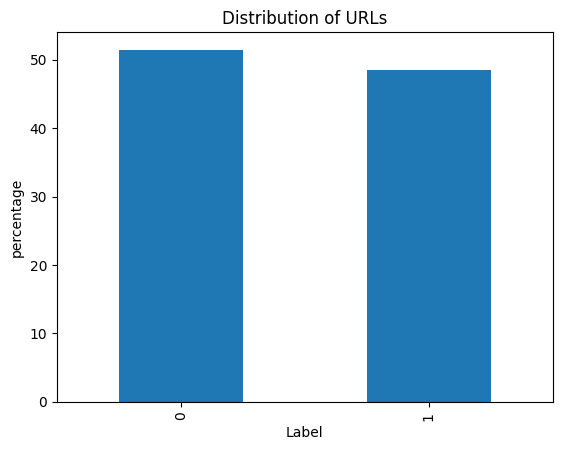

In [ ]:

((df['label'].value_counts()/len(df))*100).plot(kind='bar')
plt.ylabel('percentage')
plt.xlabel('Label')
plt.title('Distribution of URLs')
plt.show()

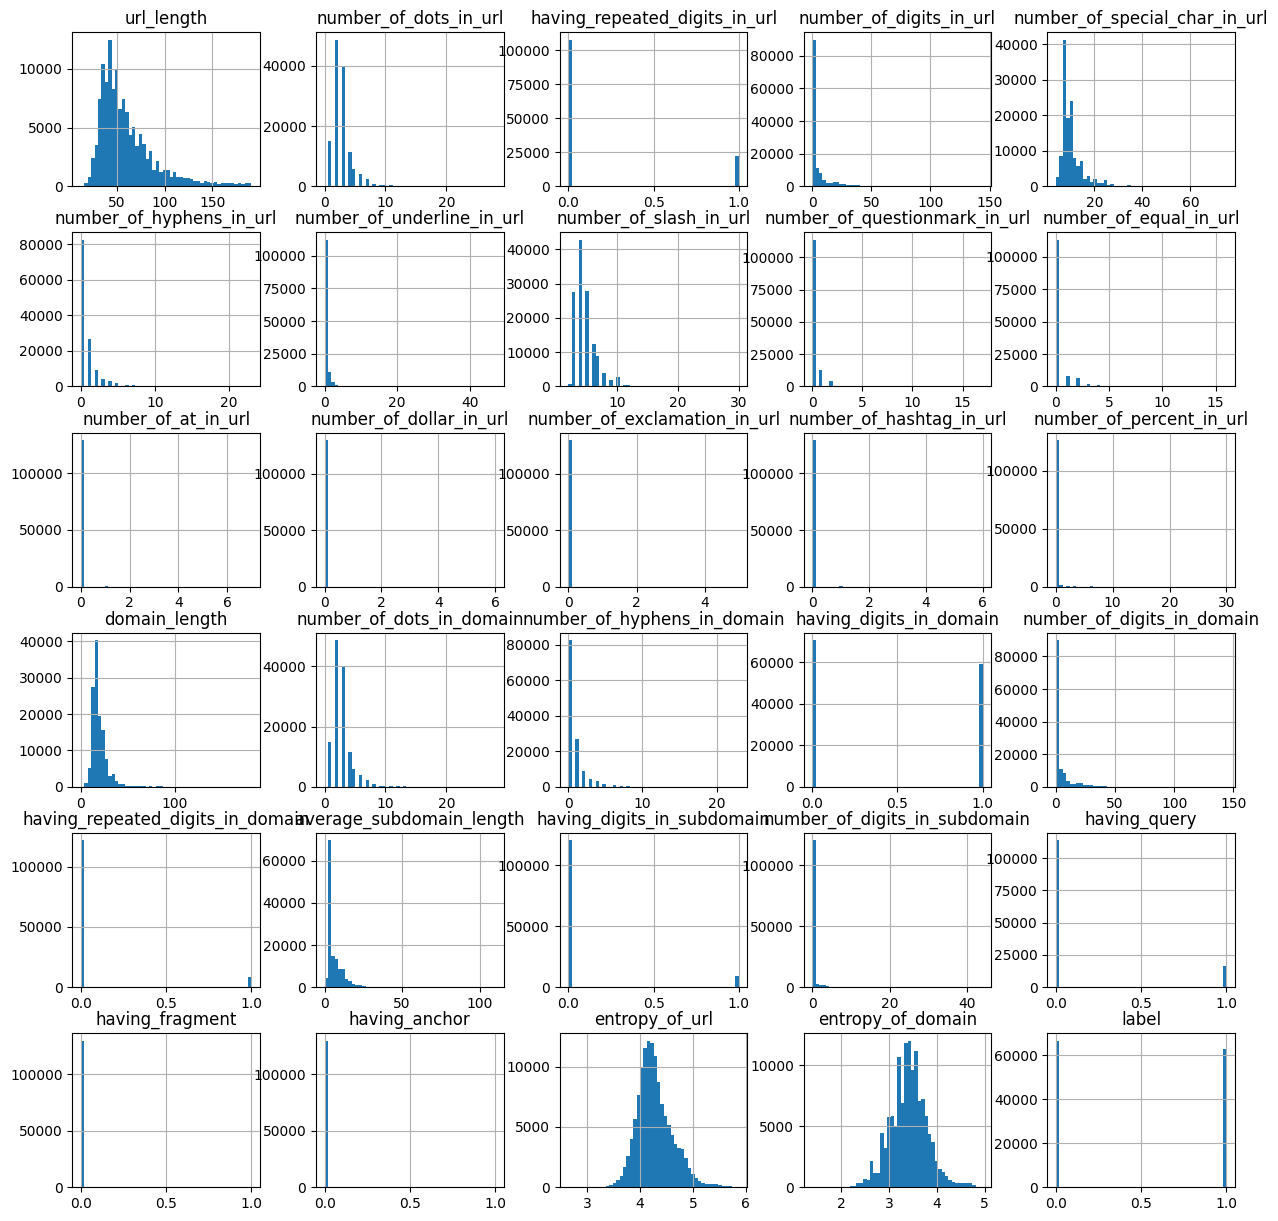

In [ ]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (15,15))
plt.show()

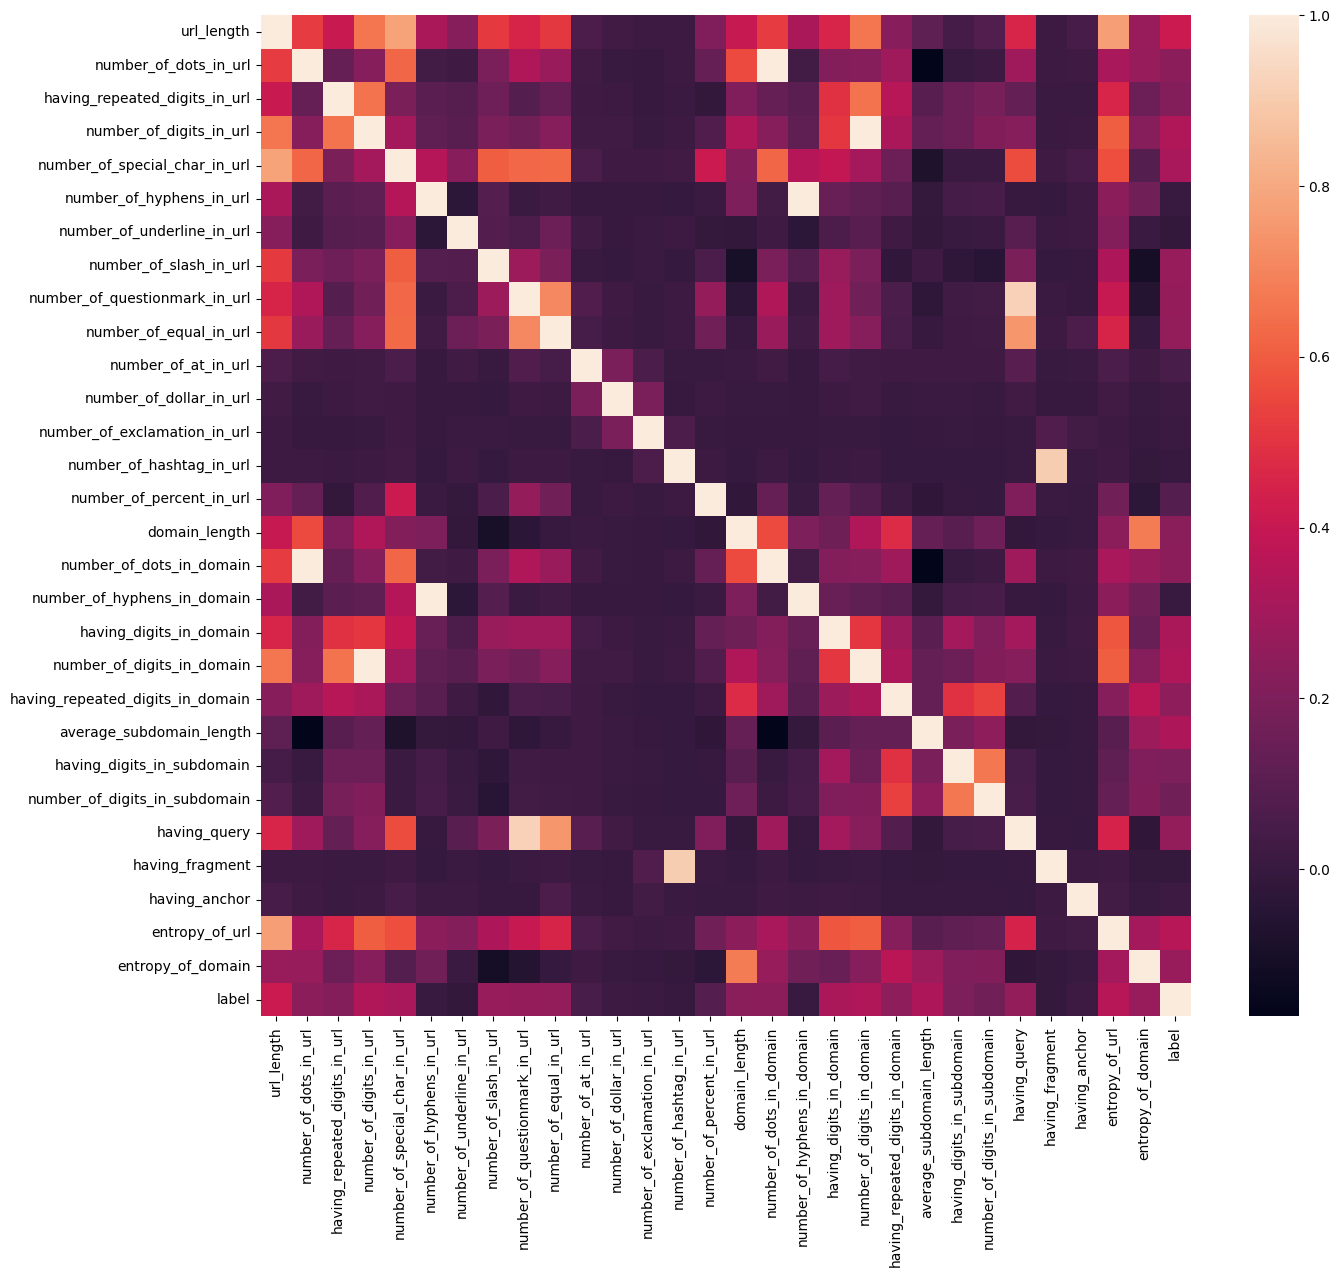

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

In [ ]:
df.corr()['label'].sort_values(ascending=False)

label                               1.000000
url_length                          0.413612
entropy_of_url                      0.357092
number_of_digits_in_url             0.338566
number_of_digits_in_domain          0.338566
average_subdomain_length            0.328738
having_digits_in_domain             0.325438
number_of_special_char_in_url       0.317343
entropy_of_domain                   0.274391
number_of_slash_in_url              0.267784
number_of_questionmark_in_url       0.265096
number_of_equal_in_url              0.261530
having_query                        0.258940
having_repeated_digits_in_domain    0.244321
number_of_dots_in_domain            0.242915
number_of_dots_in_url               0.242915
domain_length                       0.234895
having_repeated_digits_in_url       0.216834
having_digits_in_subdomain          0.201807
number_of_digits_in_subdomain       0.167199
number_of_percent_in_url            0.087607
number_of_at_in_url                 0.054692
having_anc

In [ ]:
# # Pairplot
# sns.pairplot(df)
# plt.show()

## **Model Building**

Normalising the dataset

In [ ]:
features = df.columns[:1]

# Applying Standard Scaling
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


df.tail()

,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,...,having_repeated_digits_in_domain,average_subdomain_length,having_digits_in_subdomain,number_of_digits_in_subdomain,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain,label
247920,-1.212736,1,1,3,6,1,0,3,0,0,...,1,6.0,1,3,0,0,0,3.970176,2.947703,1
247926,0.456188,2,0,0,13,5,0,5,0,0,...,0,3.0,0,0,0,0,0,4.140442,3.558519,0
247928,0.489566,3,0,5,12,5,0,3,0,0,...,0,10.0,0,0,0,0,0,4.450151,3.849224,0
247934,0.255917,5,0,1,12,1,0,5,0,0,...,0,8.0,0,0,0,0,0,4.194153,3.942439,1
247939,1.123757,6,0,0,18,5,1,4,0,1,...,0,3.0,0,0,0,0,0,4.503351,3.610577,1


### **Train-Test Split**

In [ ]:
X = df.drop(columns=['label'])
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print(
    "Training data shape: \n\n",
    X_train.shape,

    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (90842, 29) 

Testing Data Shape: 

 (38933, 29)


## **SVM Model**

In [ ]:
svm_model = SVC(probability=True, random_state=42)

# Train the SVM classifier
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [ ]:
# Making predictions
svm_train_pred = svm_model.predict(X_train)
svm_test_pred = svm_model.predict(X_test)

In [ ]:
# Make predictions and get probability scores
svm_proba = svm_model.predict_proba(X_test)[:, 1]

In [ ]:
svm_train_accuracy = accuracy_score(y_train, svm_train_pred)
svm_train_precision = precision_score(y_train, svm_train_pred)
svm_train_recall = recall_score(y_train, svm_train_pred)
svm_train_f1 = f1_score(y_train, svm_train_pred)
print("Training Set  Accuracy:", svm_train_accuracy)
print("Training Set Precision:", svm_train_precision)
print("Training Set Recall:", svm_train_recall)
print("Training Set F1 Score:", svm_train_f1)

Training Set  Accuracy: 0.8338103520398054
Training Set Precision: 0.8607733432798707
Training Set Recall: 0.7846942013873147
Training Set F1 Score: 0.8209749908098044


In [ ]:

# Accuracy, Precision, Recall, F1-Score for test set
svm_test_accuracy = accuracy_score(y_test, svm_test_pred)
svm_test_precision = precision_score(y_test, svm_test_pred)
svm_test_recall = recall_score(y_test, svm_test_pred)
svm_test_f1 = f1_score(y_test, svm_test_pred)
print("Test Set (svm) - Accuracy:", svm_test_accuracy)
print("Test Set (svm) - Precision:", svm_test_precision )
print("Test Set (svm) - Recall:", svm_test_recall)
print("Test Set (svm) - F1 Score:", svm_test_f1)

Test Set (svm) - Accuracy: 0.8310687591503352
Test Set (svm) - Precision: 0.8641464855286474
Test Set (svm) - Recall: 0.7737874861162533
Test Set (svm) - F1 Score: 0.81647459329743


In [ ]:
# # Cross-validation to check for overfitting
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# recall_scorer = make_scorer(recall_score)

# # Perform cross-validation and calculate recall
# cv_recall_scores = cross_val_score(svm_model, X_train, y_train, cv=cv, scoring=recall_scorer)

# # Print recall scores for each fold
# print("Cross-Validation Recall Scores:", cv_recall_scores)

# # Print mean recall score
# print("Mean Cross-Validation Recall Score:", cv_recall_scores.mean() * 100)

Confusion Matrix (Test Set):
[[17726  2300]
 [ 4277 14630]]


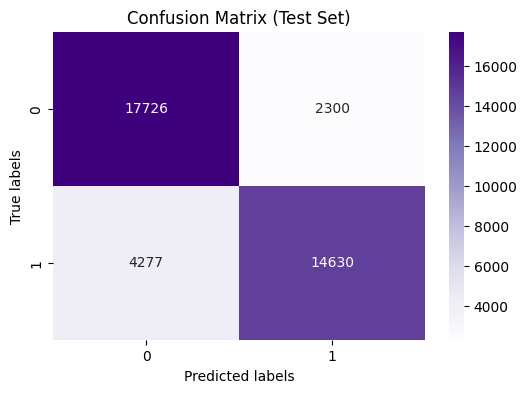

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.81      0.89      0.84     20026
           1       0.86      0.77      0.82     18907

    accuracy                           0.83     38933
   macro avg       0.83      0.83      0.83     38933
weighted avg       0.83      0.83      0.83     38933



In [ ]:

# Confusion matrix for test set
svm_test_cm = confusion_matrix(y_test, svm_test_pred)
print("Confusion Matrix (Test Set):")
print(svm_test_cm)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_test_cm, annot=True, cmap='Purples', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Test Set)')
plt.show()


# Classification report for test set
svm_test_cr = classification_report(y_test, svm_test_pred)
print("Classification Report (Test Set):")
print(svm_test_cr)


In [ ]:
# ROC AUC for test set
svm_roc_auc = roc_auc_score(y_test, svm_proba)
print("ROC AUC (Test Set):", svm_roc_auc)

ROC AUC (Test Set): 0.9067839182522286


## **Decision Tree**

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test sets
tree_train_pred = tree_model.predict(X_train)
tree_test_pred = tree_model.predict(X_test)
tree_test_proba = tree_model.predict_proba(X_test)[:, 1]

### **Decision Tree Evaluation**

In [ ]:
tree_train_accuracy = accuracy_score(y_train, tree_train_pred)
tree_train_precision = precision_score(y_train, tree_train_pred)
tree_train_recall = recall_score(y_train, tree_train_pred)
tree_train_f1 = f1_score(y_train, tree_train_pred)

print("Training Set (tree)  Accuracy:", tree_train_accuracy)
print("Training Set (tree) Precision:", tree_train_precision)
print("Training Set (tree) Recall:", tree_train_recall)
print("Training Set (tree) F1 Score:", tree_train_f1 )


Training Set (tree)  Accuracy: 0.9987560819885075
Training Set (tree) Precision: 1.0
Training Set (tree) Recall: 0.9974384549122728
Training Set (tree) F1 Score: 0.9987175849741815


In [ ]:
tree_test_accuracy = accuracy_score(y_test, tree_test_pred)
tree_test_precision = precision_score(y_test, tree_test_pred)
tree_test_recall = recall_score(y_test, tree_test_pred)
tree_test_f1 = f1_score(y_test, tree_test_pred)

print("Test Set (tree)  Accuracy:", tree_test_accuracy)
print("Test Set (tree) Precision:", tree_test_precision )
print("Test Set (tree) Recall:", tree_test_recall)
print("Test Set (tree) F1 Score:", tree_test_f1)

Test Set (tree)  Accuracy: 0.8508206405876763
Test Set (tree) Precision: 0.8476933694324998
Test Set (tree) Recall: 0.8445549267467076
Test Set (tree) F1 Score: 0.8461212378126325


In [ ]:
# Cross-validation to check for overfitting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scorer = make_scorer(recall_score)

# Perform cross-validation and calculate recall
cv_recall_scores = cross_val_score(tree_model, X_train, y_train, cv=cv, scoring=recall_scorer)

# Print recall scores for each fold
print("Cross-Validation Recall Scores:", cv_recall_scores)

# Print mean recall score
print("Mean Cross-Validation Recall Score:", cv_recall_scores.mean() * 100)

Cross-Validation Recall Scores: [0.83690355 0.83973705 0.85152442 0.84291057 0.84459306]
Mean Cross-Validation Recall Score: 84.31337321333514


Confusion Matrix (Test Set):
[[17157  2869]
 [ 2939 15968]]


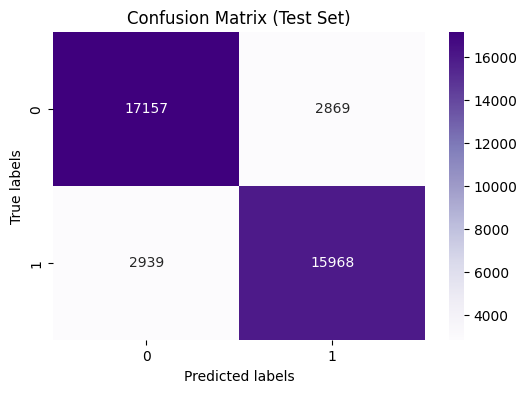

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     20026
           1       0.85      0.84      0.85     18907

    accuracy                           0.85     38933
   macro avg       0.85      0.85      0.85     38933
weighted avg       0.85      0.85      0.85     38933



In [ ]:

# Confusion matrix for test set
tree_test_cm = confusion_matrix(y_test, tree_test_pred)
print("Confusion Matrix (Test Set):")
print(tree_test_cm)
plt.figure(figsize=(6, 4))
sns.heatmap(tree_test_cm, annot=True, cmap='Purples', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Classification report for test set
tree_test_cr = classification_report(y_test, tree_test_pred)
print("Classification Report (Test Set):")
print(tree_test_cr)

In [ ]:
# ROC AUC score

tree_roc_auc = roc_auc_score(y_test, tree_test_proba)
print("ROC AUC (Test Set):", tree_roc_auc)

ROC AUC (Test Set): 0.8509926675899951


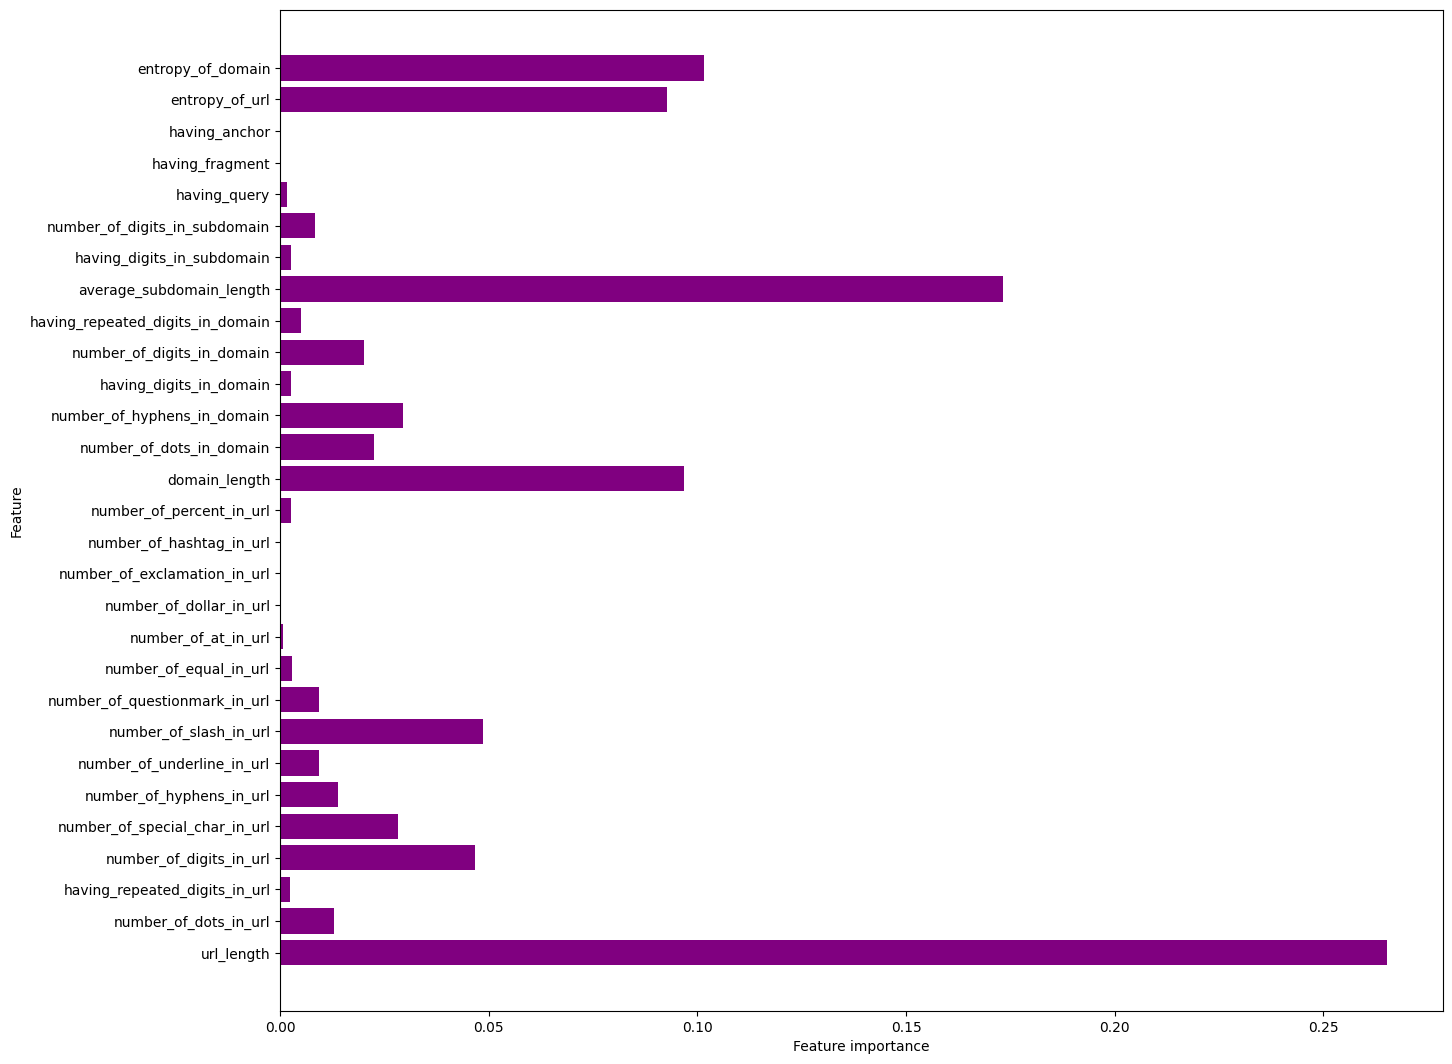

In [ ]:
# Feature Importance

plt.figure(figsize=(15,13))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree_model.feature_importances_, align='center', color = "purple")
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## **Tuned Decision Tree**

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best Cross-Validation Score: 0.8674732504998147
Accuracy: 0.8688516168802816


In [ ]:
tree_tuned = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=20,
                                    max_features=None,
                                    min_samples_leaf=5,
                                    min_samples_split=20,
                                    )

In [ ]:
tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=20)

In [ ]:
tree_tuned_train_pred = tree_tuned.predict(X_train)
tree_tuned_test_pred = tree_tuned.predict(X_test)
tree_tuned_test_proba = tree_tuned.predict_proba(X_test)[:, 1]

### **Evaluation**

In [ ]:
tree_tuned_train_accuracy = accuracy_score(y_train, tree_tuned_train_pred)
tree_tuned_train_precision = precision_score(y_train, tree_tuned_train_pred)
tree_tuned_train_recall = recall_score(y_train, tree_tuned_train_pred)
tree_tuned_train_f1 = f1_score(y_train, tree_tuned_train_pred)

print("Training Set (tree)  Accuracy:", tree_tuned_train_accuracy)
print("Training Set (tree) Precision:", tree_tuned_train_precision)
print("Training Set (tree) Recall:", tree_tuned_train_recall)
print("Training Set (tree) F1 Score:", tree_tuned_train_f1 )

Training Set (tree)  Accuracy: 0.9098874969727659
Training Set (tree) Precision: 0.9296990862555614
Training Set (tree) Recall: 0.881058167475178
Training Set (tree) F1 Score: 0.9047253258845438


In [ ]:
tree_tuned_test_accuracy = accuracy_score(y_test, tree_tuned_test_pred)
tree_tuned_test_precision = precision_score(y_test, tree_tuned_test_pred)
tree_tuned_test_recall = recall_score(y_test, tree_tuned_test_pred)
tree_tuned_test_f1 = f1_score(y_test, tree_tuned_test_pred)

print("Test Set (tree)  Accuracy:", tree_tuned_test_accuracy)
print("Test Set (tree) Precision:", tree_tuned_test_precision )
print("Test Set (tree) Recall:", tree_tuned_test_recall)
print("Test Set (tree) F1 Score:", tree_tuned_test_f1)

Test Set (tree)  Accuracy: 0.8685690802147279
Test Set (tree) Precision: 0.890607296623612
Test Set (tree) Recall: 0.8314909821759137
Test Set (tree) F1 Score: 0.8600344648376598


Confusion Matrix (Test Set):
[[17157  2869]
 [ 2939 15968]]


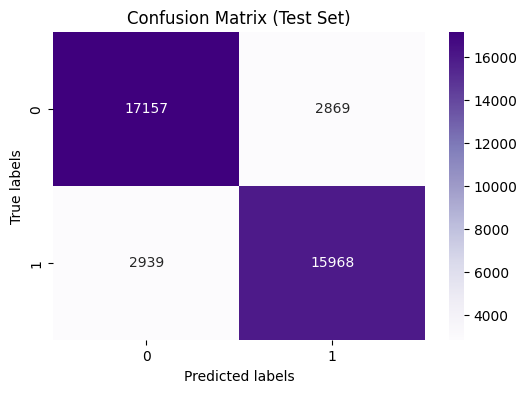

In [ ]:
# Confusion Matrix

cm = confusion_matrix(y_test, tree_tuned_test_pred)
print("Confusion Matrix (Test Set):")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Test Set)')
plt.show()


## **Random Forest**

In [ ]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the training data
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
RF_train_pred = RF.predict(X_train)
RF_test_pred = RF.predict(X_test)
RF_test_proba = RF.predict_proba(X_test)[:, 1]

### **Evaluation**

In [ ]:
RF_train_accuracy = accuracy_score(y_train, RF_train_pred)
RF_train_precision = precision_score(y_train, RF_train_pred)
RF_train_recall = recall_score(y_train, RF_train_pred)
RF_train_f1 = f1_score(y_train, RF_train_pred)

print("Training Set (RF)  Accuracy:", RF_train_accuracy)
print("Training Set (RF) Precision:", RF_train_precision)
print("Training Set (RF) Recall:", RF_train_recall)
print("Training Set (RF) F1 Score:", RF_train_f1 )

Training Set (RF)  Accuracy: 0.9987560819885075
Training Set (RF) Precision: 0.9989341195146842
Training Set (RF) Recall: 0.9985038763204425
Training Set (RF) F1 Score: 0.9987189515809045


In [ ]:
RF_test_accuracy = accuracy_score(y_test, RF_test_pred)
RF_test_precision = precision_score(y_test, RF_test_pred)
RF_test_recall = recall_score(y_test, RF_test_pred)
RF_test_f1 = f1_score(y_test, RF_test_pred)

print("Test Set (RF)  Accuracy:", RF_test_accuracy)
print("Test Set (RF) Precision:", RF_test_precision )
print("Test Set (RF) Recall:", RF_test_recall )
print("Test Set (RF) F1 Score:", RF_test_f1 )

Test Set (RF)  Accuracy: 0.8964631546502967
Test Set (RF) Precision: 0.9128094128094129
Test Set (RF) Recall: 0.8698894589305548
Test Set (RF) F1 Score: 0.890832769126608


In [ ]:
# Cross Validaton to check for overfitting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scorer = make_scorer(recall_score)

# Perform cross-validation and calculate recall
cv_recall_scores = cross_val_score(RF, X_train, y_train, cv=cv, scoring=recall_scorer)

# Print recall scores for each fold
print("Cross-Validation Recall Scores:", cv_recall_scores)

# Print mean recall score
print("Mean Cross-Validation Recall Score:", cv_recall_scores.mean() * 100)

Cross-Validation Recall Scores: [0.86750538 0.86863878 0.8782727  0.87362575 0.87338472]
Mean Cross-Validation Recall Score: 87.22854671816846


Confusion Matrix (Test Set):
[[18455  1571]
 [ 2460 16447]]


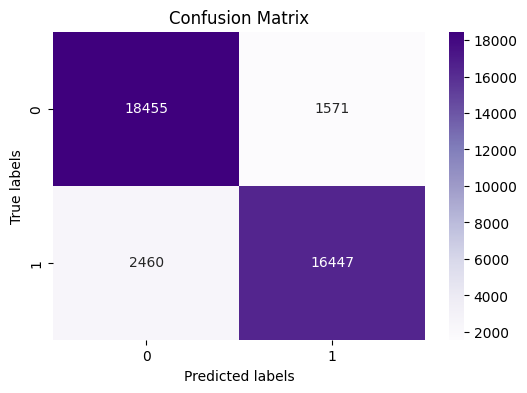

In [ ]:
RF_test_cm = confusion_matrix(y_test, RF_test_pred)
print("Confusion Matrix (Test Set):")
print(RF_test_cm)
plt.figure(figsize=(6, 4))
sns.heatmap(RF_test_cm, annot=True, cmap='Purples', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# ROC AUC score

RF_roc_auc = roc_auc_score(y_test, RF_test_proba)
print("ROC AUC (Test Set):", RF_roc_auc)

ROC AUC (Test Set): 0.9589899199164004


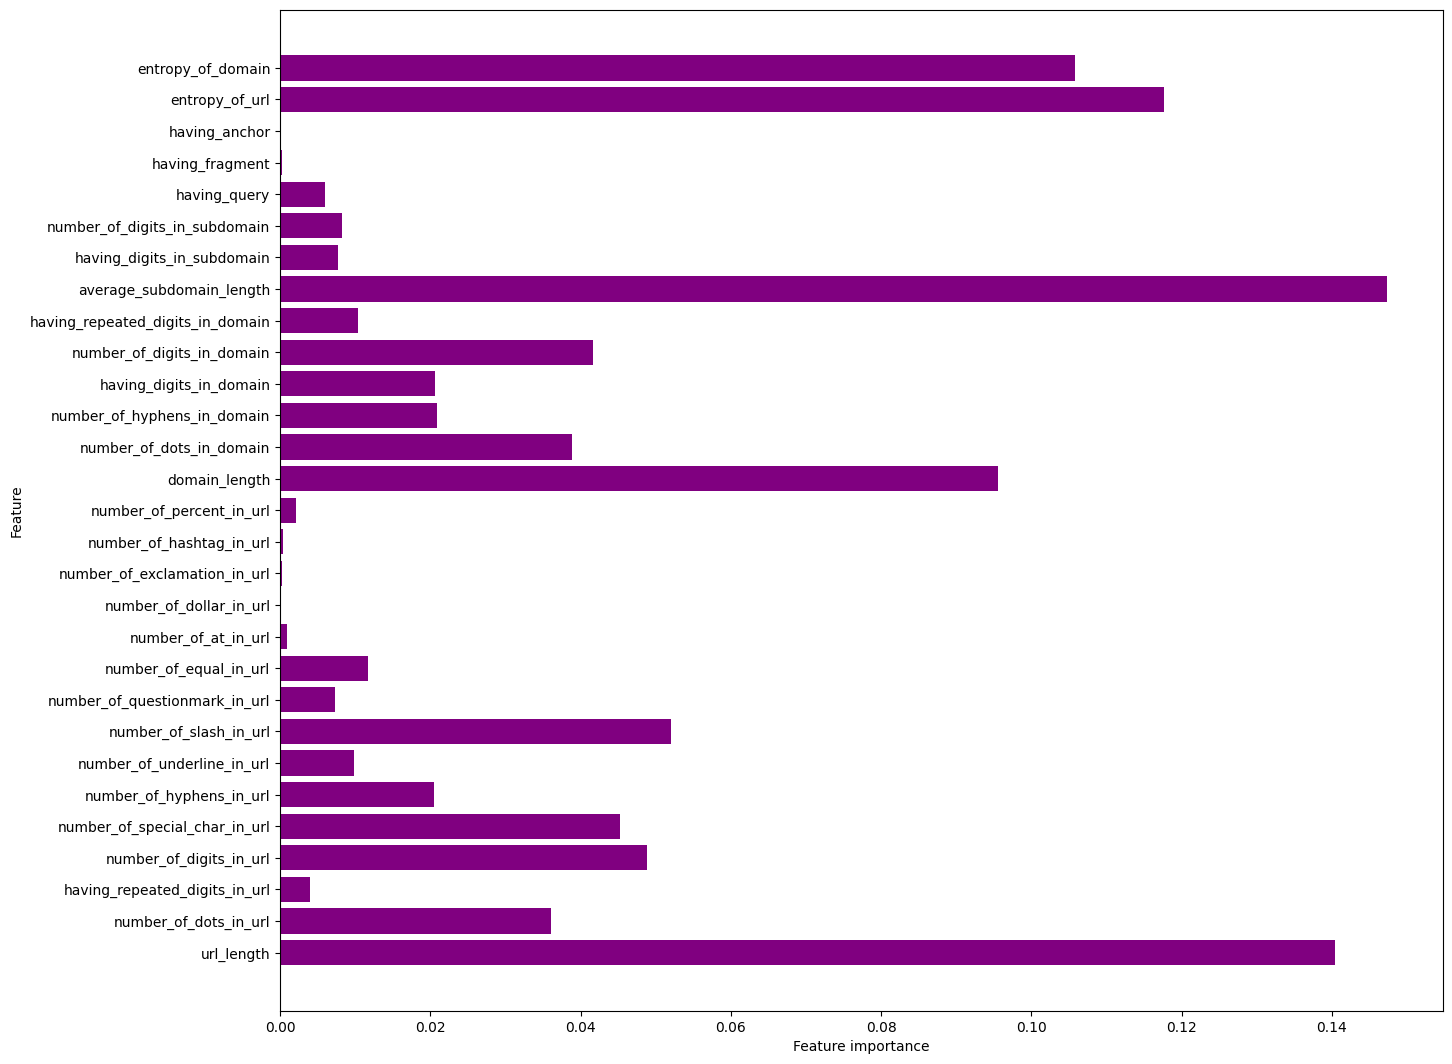

In [ ]:
# feature importance

plt.figure(figsize=(15,13))
n_features = X_train.shape[1]
plt.barh(range(n_features), RF.feature_importances_, align='center', color = "purple")
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## **XGBoost Classifier**

In [ ]:
xgb = XGBClassifier()

# Train the XGBoost model on the training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)
xgb_test_proba = xgb.predict_proba(X_test)[:, 1]

### **Evaluation**

In [ ]:
xgb_train_accuracy = accuracy_score(y_train, xgb_train_pred)
xgb_train_precision = precision_score(y_train, xgb_train_pred)
xgb_train_recall = recall_score(y_train, xgb_train_pred)
xgb_train_f1 = f1_score(y_train, xgb_train_pred)

print("Training Set (xgb)  Accuracy:", xgb_train_accuracy)
print("Training Set (xgb) Precision:", xgb_train_precision)
print("Training Set (xgb) Recall:", xgb_train_recall)
print("Training Set (xgb) F1 Score:", xgb_train_f1)


Training Set (xgb)  Accuracy: 0.906232799806257
Training Set (xgb) Precision: 0.9309651799118601
Training Set (xgb) Recall: 0.8715373804234483
Training Set (xgb) F1 Score: 0.9002716245960755


In [ ]:
xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)
xgb_test_precision = precision_score(y_test, xgb_test_pred)
xgb_test_recall = recall_score(y_test, xgb_test_pred)
xgb_test_f1 = f1_score(y_test, xgb_test_pred)

print("Test Set (xgb)  Accuracy:", xgb_test_accuracy)
print("Test Set (xgb) Precision:", xgb_test_precision)
print("Test Set (xgb) Recall:", xgb_test_recall)
print("Test Set (xgb) F1 Score:", xgb_test_f1)

Test Set (xgb)  Accuracy: 0.8897593301312511
Test Set (xgb) Precision: 0.9153640652532257
Test Set (xgb) Recall: 0.8517480298302216
Test Set (xgb) F1 Score: 0.8824109589041095


In [ ]:
# Cross Validation to check for overfitting

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scorer = make_scorer(recall_score)

# Perform cross-validation and calculate recall
cv_recall_scores = cross_val_score(xgb, X_train, y_train, cv=cv, scoring=recall_scorer)
# Print recall scores for each fold
print("Cross-Validation Recall Scores:", cv_recall_scores)

# Print mean recall score
print("Mean Cross-Validation Recall Score:", cv_recall_scores.mean())



Cross-Validation Recall Scores: [0.8511844  0.85299785 0.86195172 0.85571801 0.85434142]
Mean Cross-Validation Recall Score: 0.8552386793929315


Confusion Matrix (Test Set):
[[18537  1489]
 [ 2803 16104]]


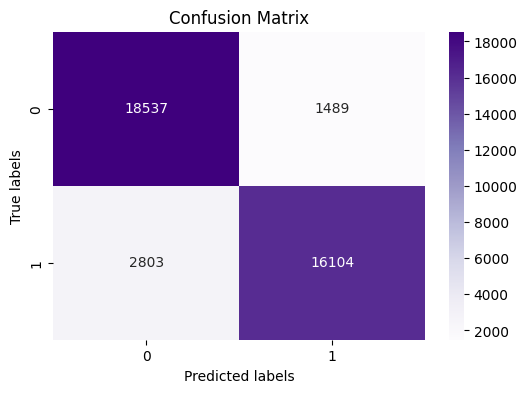

In [ ]:
#Confusion Matrix

xgb_test_cm = confusion_matrix(y_test, xgb_test_pred)
print("Confusion Matrix (Test Set):")
print(xgb_test_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(xgb_test_cm, annot=True, cmap='Purples', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# ROC AUC Score

xgb_roc_auc = roc_auc_score(y_test, xgb_test_proba)
print("ROC AUC (Test Set):", xgb_roc_auc)



ROC AUC (Test Set): 0.9558091181627844


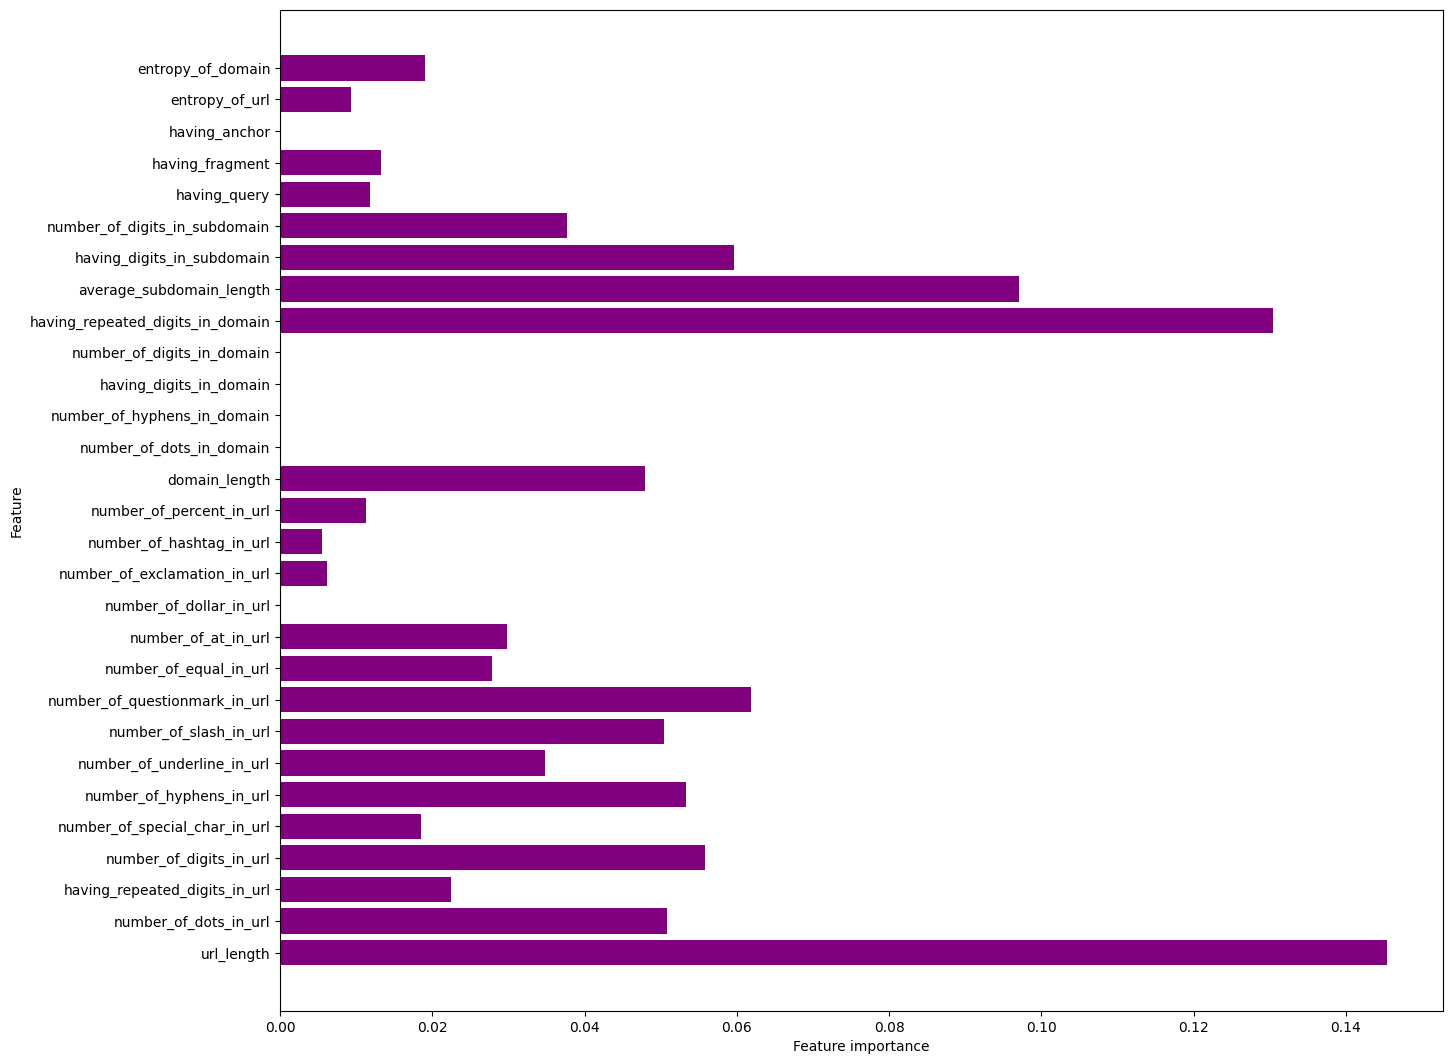

In [ ]:
# Feature Importance
plt.figure(figsize=(15,13))
n_features = X_train.shape[1]
plt.barh(range(n_features), xgb.feature_importances_, align='center', color = "purple")
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## **Tuned XGBoost**

In [ ]:
xgb_tuned = XGBClassifier(
    n_estimators=300,
    colsample_bytree=0.9,
    gamma=0,
    subsample=0.8,
    learning_rate=0.1,
    eval_metric="logloss",
    max_depth=6,)

In [ ]:
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_tuned_train_pred = xgb_tuned.predict(X_train)
xgb_tuned_test_pred = xgb_tuned.predict(X_test)
xgb_tuned_test_proba = xgb_tuned.predict_proba(X_test)[:, 1]

In [ ]:
xgb_tuned_train_accuracy = accuracy_score(y_train, xgb_tuned_train_pred)
xgb_tuned_train_precision = precision_score(y_train, xgb_tuned_train_pred)
xgb_tuned_train_recall = recall_score(y_train, xgb_tuned_train_pred)
xgb_tuned_train_f1 = f1_score(y_train, xgb_tuned_train_pred)

print("Training Set (xgb)  Accuracy:", xgb_tuned_train_accuracy)
print("Training Set (xgb) Precision:", xgb_tuned_train_precision)
print("Training Set (xgb) Recall:", xgb_tuned_train_recall)
print("Training Set (xgb) F1 Score:", xgb_tuned_train_f1)

Training Set (xgb)  Accuracy: 0.9050108980427556
Training Set (xgb) Precision: 0.9300065437095563
Training Set (xgb) Recall: 0.869859908419096
Training Set (xgb) F1 Score: 0.8989282576866765


In [ ]:
xgb_tuned_test_accuracy = accuracy_score(y_test, xgb_tuned_test_pred)
xgb_tuned_test_precision = precision_score(y_test, xgb_tuned_test_pred)
xgb_tuned_test_recall = recall_score(y_test, xgb_tuned_test_pred)
xgb_tuned_test_f1 = f1_score(y_test, xgb_tuned_test_pred)

print("Test Set (xgb)  Accuracy:", xgb_tuned_test_accuracy)
print("Test Set (xgb) Precision:", xgb_tuned_test_precision)
print("Test Set (xgb) Recall:", xgb_tuned_test_recall)
print("Test Set (xgb) F1 Score:", xgb_tuned_test_f1)

Test Set (xgb)  Accuracy: 0.8901702925538746
Test Set (xgb) Precision: 0.9167188835089718
Test Set (xgb) Recall: 0.8511662347278786
Test Set (xgb) F1 Score: 0.8827272228621579


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scorer = make_scorer(recall_score)

# Perform cross-validation and calculate recall
cv_recall_scores = cross_val_score(xgb_tuned, X_train, y_train, cv=cv, scoring=recall_scorer)
# Print recall scores for each fold
print("Cross-Validation Recall Scores:", cv_recall_scores)

# Print mean recall score
print("Mean Cross-Validation Recall Score:", cv_recall_scores.mean())


Cross-Validation Recall Scores: [0.85095772 0.85129774 0.8627451  0.85798481 0.85819542]
Mean Cross-Validation Recall Score: 0.8562361599324616


Confusion Matrix (Test Set):
[[18564  1462]
 [ 2814 16093]]


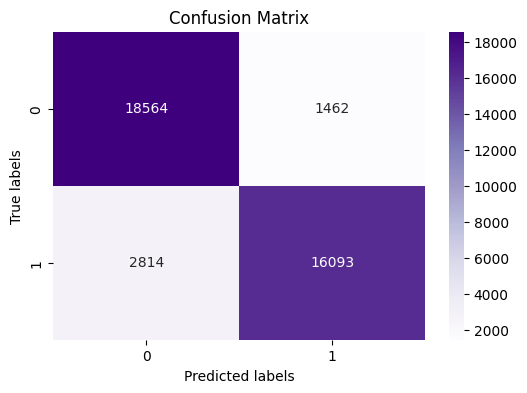

In [ ]:
# Confusion Matrix

xgb_tuned_test_cm = confusion_matrix(y_test, xgb_tuned_test_pred)
print("Confusion Matrix (Test Set):")
print(xgb_tuned_test_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(xgb_tuned_test_cm, annot=True, cmap='Purples', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# AUC ROC score

xgb_tuned_roc_auc = roc_auc_score(y_test, xgb_tuned_test_proba)
print("ROC AUC (Test Set):", xgb_tuned_roc_auc)


ROC AUC (Test Set): 0.9562442271389817


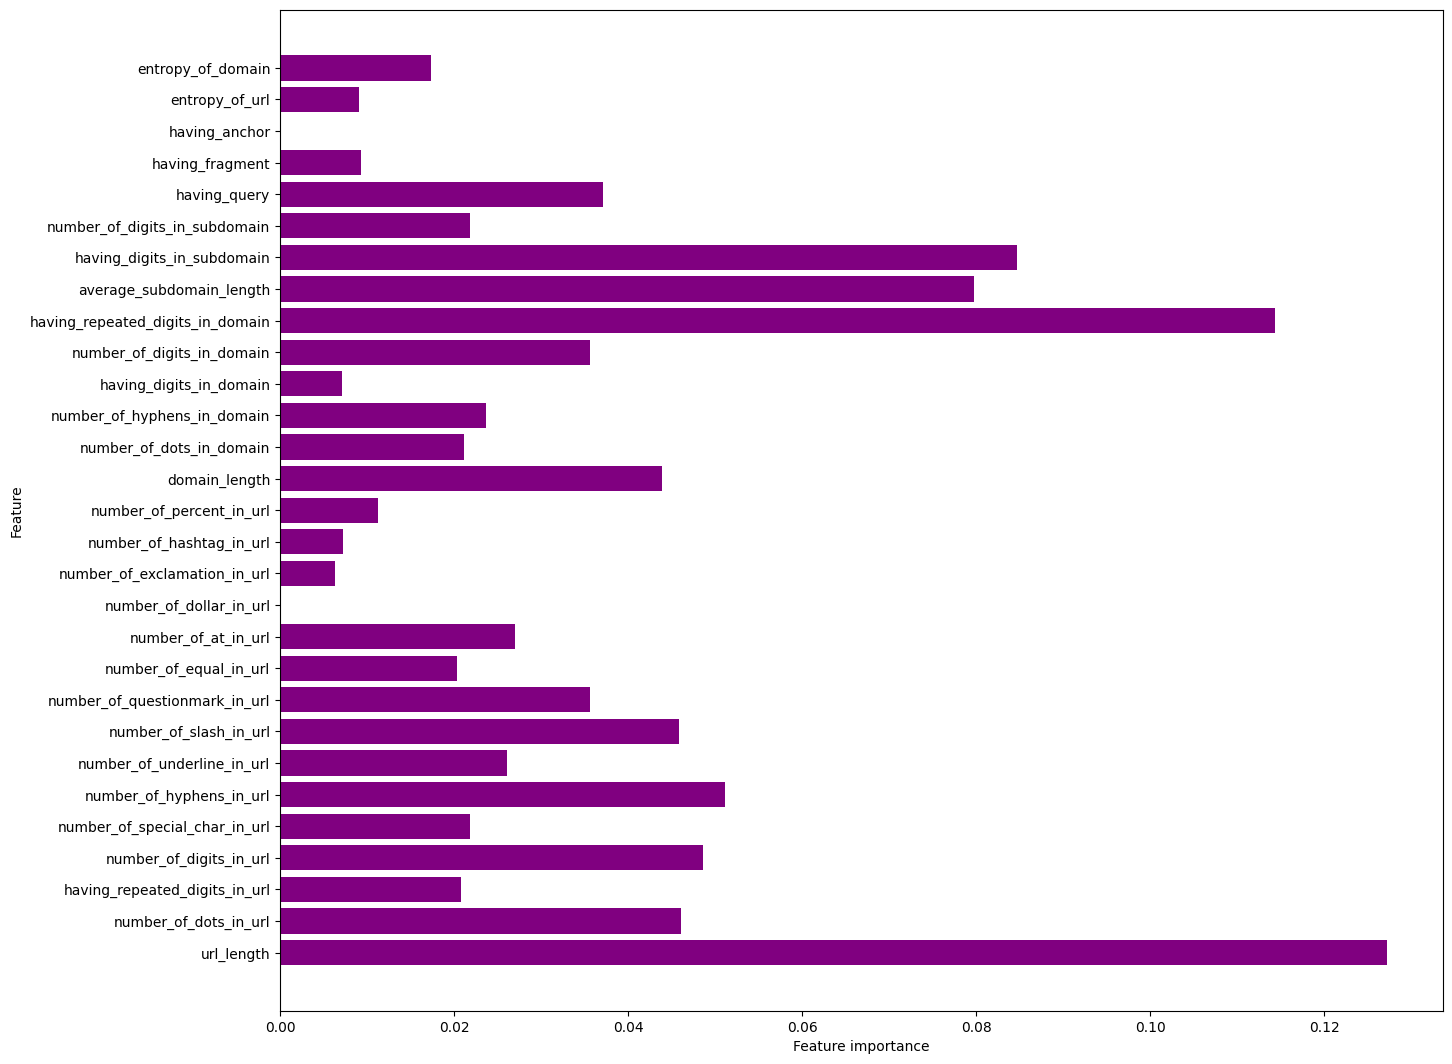

In [ ]:
# Feature Importance

plt.figure(figsize=(15,13))
n_features = X_train.shape[1]
plt.barh(range(n_features), xgb_tuned.feature_importances_, align='center', color = "purple")
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

## **KNN Model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

#Fit the KNN model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)
knn_test_proba = knn.predict_proba(X_test)[:, 1]

### **Evaluation**

In [ ]:
knn_train_accuracy = accuracy_score(y_train, knn_train_pred)
knn_train_precision = precision_score(y_train, knn_train_pred)
knn_train_recall = recall_score(y_train, knn_train_pred)
knn_train_f1 = f1_score(y_train, knn_train_pred)

print("Training Set (knn)  Accuracy:", knn_train_accuracy)
print("Training Set (knn) Precision:", knn_train_precision)
print("Training Set (knn) Recall:", knn_train_recall)
print("Training Set (knn) F1 Score:", knn_train_f1)

Training Set (knn)  Accuracy: 0.9104268950485458
Training Set (knn) Precision: 0.925410902211186
Training Set (knn) Recall: 0.887042662193408
Training Set (knn) F1 Score: 0.9058206692207087


In [ ]:
knn_test_accuracy = accuracy_score(y_test, knn_test_pred)
knn_test_precision = precision_score(y_test, knn_test_pred)
knn_test_recall = recall_score(y_test, knn_test_pred)
knn_test_f1 = f1_score(y_test, knn_test_pred)

print("Test Set (knn)  Accuracy:", knn_test_accuracy)
print("Test Set (knn) Precision:", knn_test_precision)
print("Test Set (knn) Recall:", knn_test_recall)
print("Test Set (knn) F1 Score:", knn_test_f1)

Test Set (knn)  Accuracy: 0.8735263144376236
Test Set (knn) Precision: 0.8902159959814702
Test Set (knn) Recall: 0.843602898397419
Test Set (knn) F1 Score: 0.8662828590049969


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scorer = make_scorer(recall_score)

# Perform cross-validation and calculate recall
cv_recall_scores = cross_val_score(knn, X_train, y_train, cv=cv, scoring=recall_scorer)

# Print recall scores for each fold
print("Cross-Validation Recall Scores:", cv_recall_scores)

# Print mean recall score
print("Mean Cross-Validation Recall Score:", cv_recall_scores.mean())

Cross-Validation Recall Scores: [0.83327666 0.84132381 0.85209113 0.84279723 0.844253  ]
Mean Cross-Validation Recall Score: 0.8427483679701655


Confusion Matrix (Test Set):
[[18059  1967]
 [ 2957 15950]]


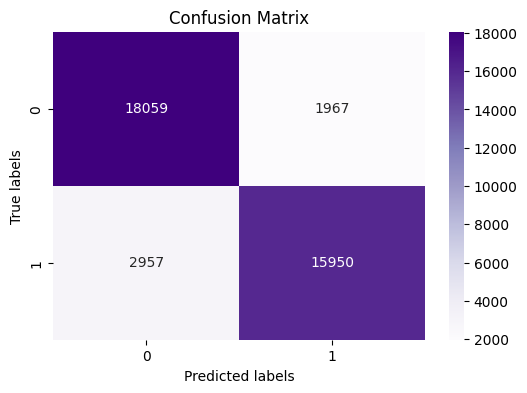

In [ ]:
#Confusion matrix

knn_test_cm = confusion_matrix(y_test, knn_test_pred)
print("Confusion Matrix (Test Set):")
print(knn_test_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(knn_test_cm, annot=True, cmap='Purples', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# ROC AUC score

knn_roc_auc = roc_auc_score(y_test, knn_test_proba)
print("ROC AUC (Test Set):", knn_roc_auc)

ROC AUC (Test Set): 0.933911502131378


## **Ensemble Method (DT and RF)**

### **Stacking**

In [ ]:
# Define base learners
base_learners = [
    ('XGBoost', XGBClassifier()),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
]

In [ ]:
# Define the meta-learner
meta_learner = LogisticRegression()

In [ ]:
# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)



StackingClassifier(cv=5,
                   estimators=[('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('random_forest',
                                RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
# Make predictions
stacking_train_pred = stacking_clf.predict(X_train)
stacking_test_pred = stacking_clf.predict(X_test)
stacking_test_proba = stacking_clf.predict_proba(X_test)[:, 1]



### **Evaluation**

In [ ]:
stacking_train_accuracy = accuracy_score(y_train, stacking_train_pred)
stacking_train_precision = precision_score(y_train, stacking_train_pred)
stacking_train_recall = recall_score(y_train, stacking_train_pred)
stacking_train_f1 = f1_score(y_train, stacking_train_pred)

print("Training Set (stacking)  Accuracy:", stacking_train_accuracy)
print("Training Set (stacking) Precision:", stacking_train_precision)
print("Training Set (stacking) Recall:", stacking_train_recall)
print("Training Set (stacking) F1 Score:", stacking_train_f1)

Training Set (stacking)  Accuracy: 0.9813412298276127
Training Set (stacking) Precision: 0.9867355134825014
Training Set (stacking) Recall: 0.9746792401505191
Training Set (stacking) F1 Score: 0.9806703235297471


In [ ]:
stacking_test_accuracy = accuracy_score(y_test, stacking_test_pred)
stacking_test_precision = precision_score(y_test, stacking_test_pred)
stacking_test_recall = recall_score(y_test, stacking_test_pred)
stacking_test_f1 = f1_score(y_test, stacking_test_pred)

print("Test Set (stacking)  Accuracy:", stacking_test_accuracy)
print("Test Set (stacking) Precision:", stacking_test_precision)
print("Test Set (stacking) Recall:", stacking_test_recall)
print("Test Set (stacking) F1 Score:", stacking_test_f1)

Test Set (stacking)  Accuracy: 0.8989802994888655
Test Set (stacking) Precision: 0.9120074840413823
Test Set (stacking) Recall: 0.8765536573755752
Test Set (stacking) F1 Score: 0.8939291782410529


In [ ]:
base_learners1 = [
    ('decision_tree', XGBClassifier()),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42))
]

In [ ]:
meta_learner1 = LogisticRegression()

In [ ]:
stacking_clf1 = StackingClassifier(estimators=base_learners1, final_estimator=meta_learner1, cv=5)

# Train the stacking classifier
stacking_clf1.fit(X_train, y_train)



StackingClassifier(cv=5,
                   estimators=[('decision_tree',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('random_forest',
                                RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
stacking_train_pred1 = stacking_clf1.predict(X_train)
stacking_test_pred1 = stacking_clf1.predict(X_test)
stacking_test_proba1 = stacking_clf1.predict_proba(X_test)

In [ ]:
stacking_test_accuracy1 = accuracy_score(y_test, stacking_test_pred1)
stacking_test_precision1 = precision_score(y_test, stacking_test_pred1)
stacking_test_recall1 = recall_score(y_test, stacking_test_pred1)
stacking_test_f11 = f1_score(y_test, stacking_test_pred1)

print("Test Set (stacking)  Accuracy:", stacking_test_accuracy1)
print("Test Set (stacking) Precision:", stacking_test_precision1)
print("Test Set (stacking) Recall:", stacking_test_recall1)
print("Test Set (stacking) F1 Score:", stacking_test_f11)

Test Set (stacking)  Accuracy: 0.8989802994888655
Test Set (stacking) Precision: 0.9120074840413823
Test Set (stacking) Recall: 0.8765536573755752
Test Set (stacking) F1 Score: 0.8939291782410529


In [ ]:
# Cross Validation to check for overfitting

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scorer = make_scorer(recall_score)

# Perform cross-validation and calculate recall
cv_recall_scores = cross_val_score(stacking_clf, X_train, y_train, cv=cv, scoring=recall_scorer)
# Print recall scores for each fold
print("Cross-Validation Recall Scores:", cv_recall_scores)

# Print mean recall score
print("Mean Cross-Validation Recall Score:", cv_recall_scores.mean())



Cross-Validation Recall Scores: [0.87532585 0.87623257 0.88552646 0.8782727  0.8801859 ]
Mean Cross-Validation Recall Score: 0.8791086974022189


Confusion Matrix (Test Set):


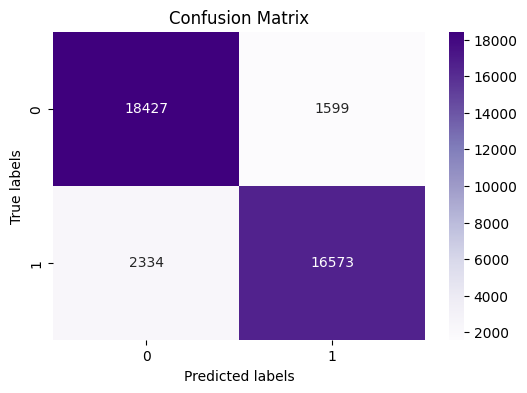

In [ ]:
# Confusion Matrix

stacking_test_cm = confusion_matrix(y_test, stacking_test_pred)
print("Confusion Matrix (Test Set):")

plt.figure(figsize=(6, 4))
sns.heatmap(stacking_test_cm, annot=True, cmap='Purples', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### **ROC Curves of all the Models**

# **Deep Learning**

## **LSTM (Long Short Term Memory)**

In [ ]:

# # Convert the Pandas DataFrames to NumPy arrays
X_train = X_train.values
X_test = X_test.values

# Reshape data for LSTM [samples, time steps, features]
# Here, time steps is 1 because we treat each sample as a single time step

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2, verbose=2)




Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1136/1136 - 4s - 3ms/step - accuracy: 0.8133 - loss: 0.4043 - val_accuracy: 0.8329 - val_loss: 0.3696
Epoch 2/25
1136/1136 - 2s - 2ms/step - accuracy: 0.8366 - loss: 0.3601 - val_accuracy: 0.8409 - val_loss: 0.3528
Epoch 3/25
1136/1136 - 2s - 2ms/step - accuracy: 0.8453 - loss: 0.3438 - val_accuracy: 0.8542 - val_loss: 0.3386
Epoch 4/25
1136/1136 - 2s - 2ms/step - accuracy: 0.8528 - loss: 0.3335 - val_accuracy: 0.8515 - val_loss: 0.3381
Epoch 5/25
1136/1136 - 2s - 2ms/step - accuracy: 0.8566 - loss: 0.3267 - val_accuracy: 0.8554 - val_loss: 0.3316
Epoch 6/25
1136/1136 - 2s - 2ms/step - accuracy: 0.8591 - loss: 0.3212 - val_accuracy: 0.8638 - val_loss: 0.3185
Epoch 7/25
1136/1136 - 2s - 2ms/step - accuracy: 0.8607 - loss: 0.3179 - val_accuracy: 0.8634 - val_loss: 0.3177
Epoch 8/25
1136/1136 - 2s - 2ms/step - accuracy: 0.8632 - loss: 0.3141 - val_accuracy: 0.8645 - val_loss: 0.3136
Epoch 9/25
1136/1136 - 2s - 2ms/step - accuracy: 0.8651 - loss: 0.3114 - val_accuracy: 0.8665 - val_loss: 0

In [ ]:
# Make predictions on the testing set
lstm_test_pred = (model.predict(X_test) > 0.5).astype("int32")
lstm_test_proba = model.predict(X_test)
lstm_train_pred = (model.predict(X_train) > 0.5).astype("int32")




1217/1217 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
2839/2839 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


### **Evaluation**

In [ ]:
LSTM_test_accuracy = accuracy_score(y_test, lstm_test_pred)
LSTM_test_precision = precision_score(y_test, lstm_test_pred)
LSTM_test_recall = recall_score(y_test, lstm_test_pred)
LSTM_test_f1 = f1_score(y_test, lstm_test_pred)

print("Test Set (LSTM)  Accuracy:", LSTM_test_accuracy)
print("Test Set (LSTM) Precision:", LSTM_test_precision)
print("Test Set (LSTM) Recall:", LSTM_test_recall)
print("Test Set (LSTM) F1 Score:", LSTM_test_f1)

Test Set (LSTM)  Accuracy: 0.8790486219916266
Test Set (LSTM) Precision: 0.9063072344322345
Test Set (LSTM) Recall: 0.8375204950547416
Test Set (LSTM) F1 Score: 0.8705571895873994


Confusion Matrix (Test Set):
[[18389  1637]
 [ 3072 15835]]


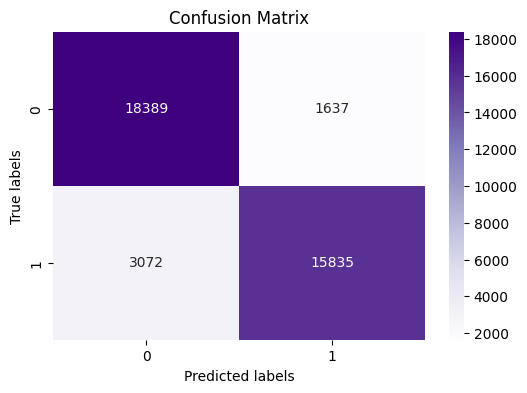

In [ ]:
# Confusion Matrix

lstm_test_cm = confusion_matrix(y_test, lstm_test_pred)
print("Confusion Matrix (Test Set):")
print(lstm_test_cm)

plt.figure(figsize=(6, 4))
sns.heatmap(lstm_test_cm, annot=True, cmap='Purples', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# ROC AUC Score

lstm_roc_auc = roc_auc_score(y_test, lstm_test_proba)
print("ROC AUC (Test Set):", lstm_roc_auc)

ROC AUC (Test Set): 0.9464427138040481


In [ ]:
# Define the hyperparameters grid
param_grid = {
    'units': [50, 100, 150],  # Number of LSTM units
    'layers': [1, 2, 3],  # Number of LSTM layers
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate
    'batch_size': [32, 64, 128],  # Batch size
    'dropout_rate': [0.2, 0.3, 0.4],  # Dropout rate
    'activation': ['tanh', 'relu'],  # Activation function
    'optimizer': ['adam', 'rmsprop'],  # Optimizer
    'epochs': [10, 20, 30],  # Number of epochs
}

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(hp):
    model = Sequential()
    # Hyperparameters for the LSTM layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(LSTM(units=hp.Int(f'units_{i}', min_value=50, max_value=150, step=50),
                       return_sequences=(i < hp.Int('num_layers', 1, 3) - 1)))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Instantiate the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='phishing_classification'
)

In [ ]:
# Perform the search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
best_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Trial 10 Complete [00h 08m 31s]
val_accuracy: 0.8660056988398234

Best val_accuracy So Far: 0.8679578105608622
Total elapsed time: 01h 20m 25s
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2839/2839 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8661 - loss: 0.3124 - val_accuracy: 0.8667 - val_loss: 0.3055
Epoch 2/10
2839/2839 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8649 - loss: 0.3134 - val_accuracy: 0.8711 - val_loss: 0.3009
Epoch 3/10
2839/2839 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8675 - loss: 0.3086 - val_accuracy: 0.8674 - val_loss: 0.3012
Epoch 4/10
2839/2839 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8671 - loss: 0.3076 - val_accuracy: 0.8671 - val_loss: 0.3029
Epoch 5/10
2839/2839 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8685 - loss: 0.3080 - val_accuracy: 0.8710 - val_loss: 0.2992
Epoch 6/10
2839/2839 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8688 - loss: 0.3056 - val_accuracy: 0.8717 - val_loss: 0.2967
Epoch 7/10
2839/2839 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8690 - loss: 0.3058 - val_accuracy: 0.8734 - val_loss: 0.2936
Epoch 8/10
2839/2839 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8695 - loss: 0.3046 - val

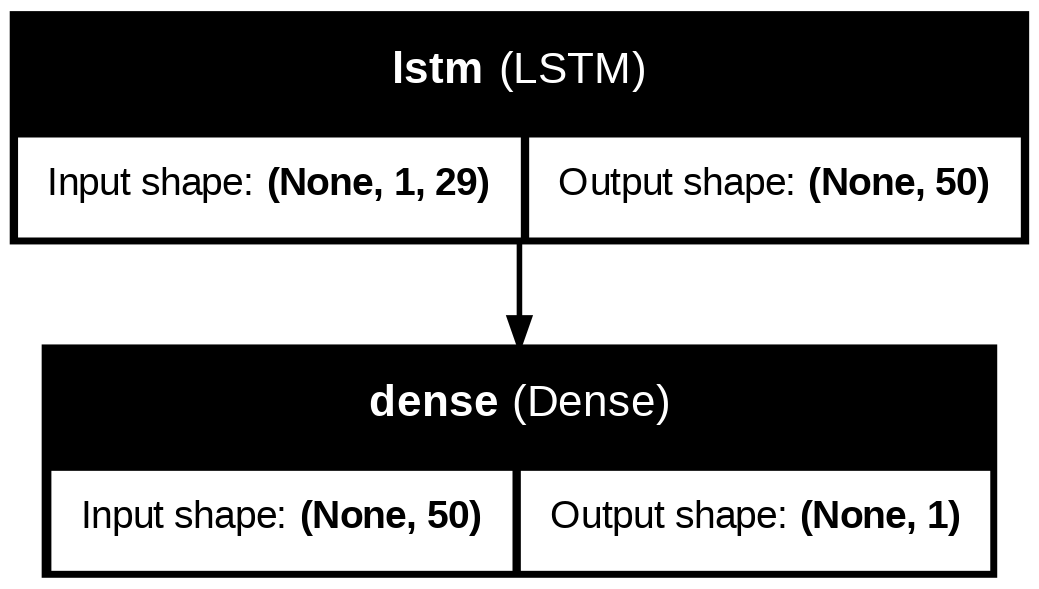

In [ ]:
plot_model(model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

# Display the model architecture
Image('lstm_model.png')

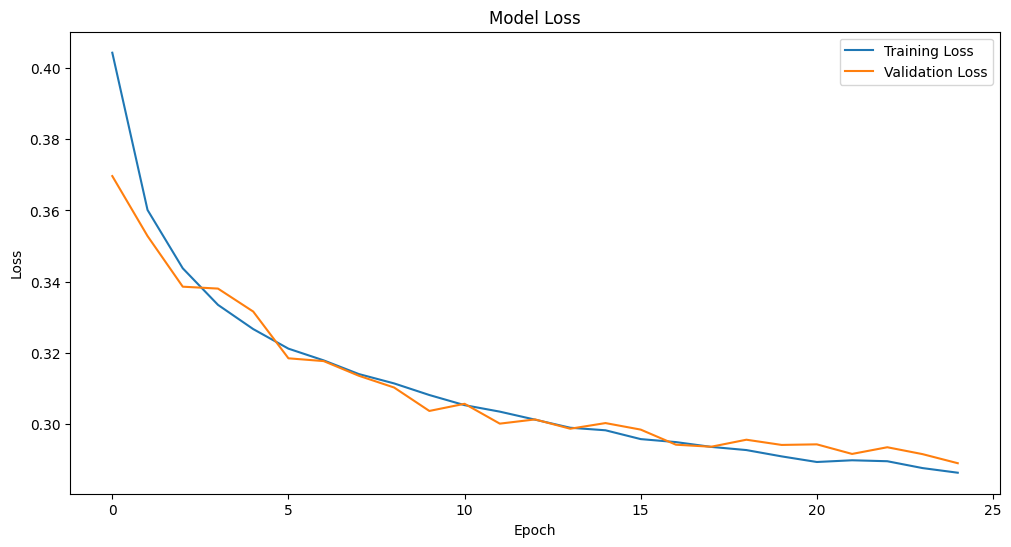

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(lstm_model.history['loss'], label='Training Loss')
plt.plot(lstm_model.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

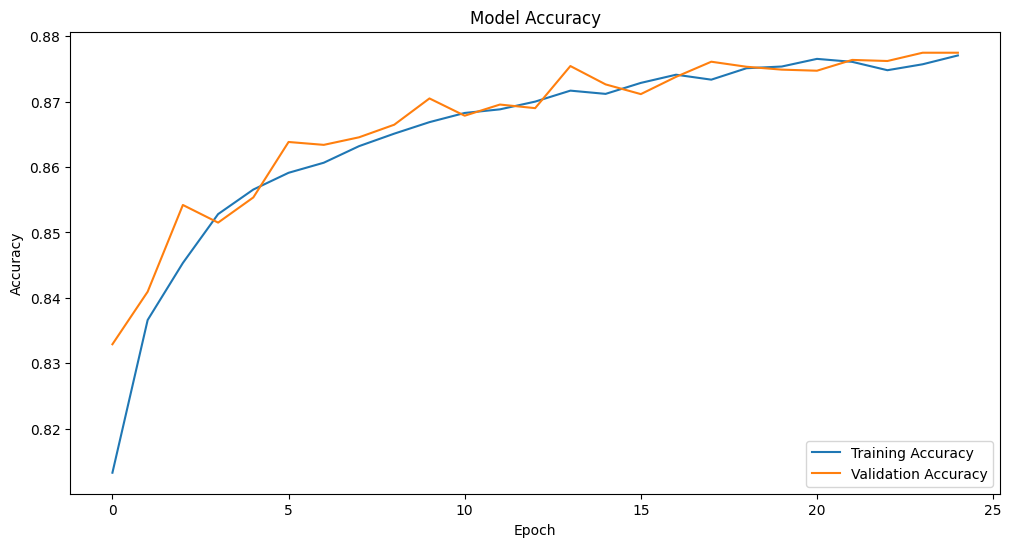

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(lstm_model.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,155 (188.11 KB)

 Trainable params: 16,051 (62.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,104 (125.41 KB)

In [ ]:

false_positive_rate1, true_positive_rate1, thresholds1 = roc_curve(y_test, svm_test_pred, pos_label=1)
false_positive_rate2, true_positive_rate2, thresholds2 = roc_curve(y_test, tree_test_proba, pos_label=1)
false_positive_rate3, true_positive_rate3, thresholds3 = roc_curve(y_test, RF_test_proba, pos_label=1)
false_positive_rate4, true_positive_rate4, thresholds4 = roc_curve(y_test, xgb_test_proba, pos_label=1)
false_positive_rate5, true_positive_rate5, thresholds5 = roc_curve(y_test, stacking_test_proba, pos_label=1)
false_positive_rate6, true_positive_rate6, thresholds6 = roc_curve(y_test, knn_test_proba, pos_label=1)
false_positive_rate7, true_positive_rate7, thresholds7 = roc_curve(y_test, xgb_tuned_test_proba, pos_label=1)
false_positive_rate8, true_positive_rate8, thresholds8 = roc_curve(y_test, lstm_test_proba, pos_label=1)
false_positive_rate9, true_positive_rate9, thresholds9 = roc_curve(y_test, tree_tuned_test_pred, pos_label=1)

# ROC curve
random_predictions = [0 for _ in range(len(y_test))]
random_fpr, random_tpr, _ = roc_curve(y_test, random_predictions, pos_label=1)

<function matplotlib.pyplot.show(close=None, block=None)>

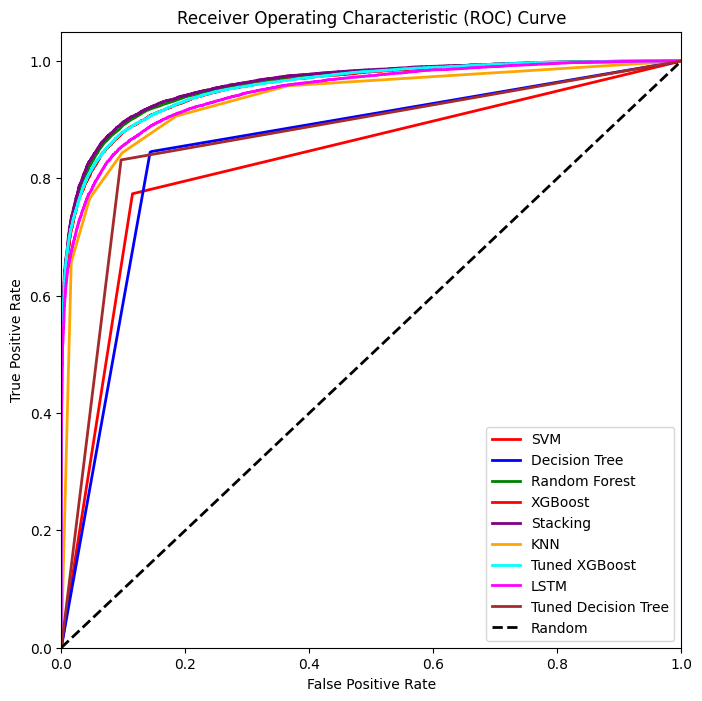

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate1, true_positive_rate1, color='red', lw=2, label='SVM')
plt.plot(false_positive_rate2, true_positive_rate2, color='blue', lw=2, label='Decision Tree')
plt.plot(false_positive_rate3, true_positive_rate3, color='green', lw=2, label='Random Forest')
plt.plot(false_positive_rate4, true_positive_rate4, color='red', lw=2, label='XGBoost')
plt.plot(false_positive_rate5, true_positive_rate5, color='purple', lw=2, label='Stacking')
plt.plot(false_positive_rate6, true_positive_rate6, color='orange', lw=2, label='KNN')
plt.plot(false_positive_rate7, true_positive_rate7, color='cyan', lw=2, label='Tuned XGBoost')
plt.plot(false_positive_rate8, true_positive_rate8, color='magenta', lw=2, label='LSTM')
plt.plot(false_positive_rate9, true_positive_rate9, color='brown', lw=2, label='Tuned Decision Tree')
plt.plot(random_fpr, random_tpr, color='black', lw=2, linestyle='--', label='Random')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show

## **Model Comparisons**

In [ ]:
# Creating a dataframe

data = {
    'Model': ['SVM', 'Decision Tree', 'Random Forest', 'XGBoost', 'Tuned XGBoost', 'KNN', 'Stacking', 'LSTM', 'Tuned Decision Tree'],
    'Accuracy': [svm_test_accuracy,tree_test_accuracy,
                 RF_test_accuracy, xgb_test_accuracy,
                 xgb_tuned_test_accuracy, knn_test_accuracy,
                 stacking_test_accuracy, LSTM_test_accuracy, tree_tuned_test_accuracy],
    'Precision': [svm_test_precision, tree_test_precision,
                  RF_test_precision, xgb_test_precision,
                  xgb_tuned_test_precision, knn_test_precision,
                  stacking_test_precision, LSTM_test_precision, tree_tuned_test_precision],
    'Recall': [svm_test_recall, tree_test_recall,
               RF_test_recall, xgb_test_recall,
               xgb_tuned_test_recall, knn_test_recall,
               stacking_test_recall, LSTM_test_recall, tree_tuned_test_recall],
    'F1 Score': [svm_test_f1, tree_test_f1,
                 RF_test_f1, xgb_test_f1,
                 xgb_tuned_test_f1, knn_test_f1,
                 stacking_test_f1, LSTM_test_f1, tree_tuned_test_f1],
}
df_metrics = pd.DataFrame(data)


In [ ]:
df_metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.831069,0.864146,0.773787,0.816475
1,Decision Tree,0.850821,0.847693,0.844555,0.846121
2,Random Forest,0.896463,0.912809,0.869889,0.890833
3,XGBoost,0.889759,0.915364,0.851748,0.882411
4,Tuned XGBoost,0.890170,0.916719,0.851166,0.882727
5,KNN,0.873526,0.890216,0.843603,0.866283
6,Stacking,0.898980,0.912007,0.876554,0.893929
7,LSTM,0.879049,0.906307,0.837520,0.870557
8,Tuned Decision Tree,0.868569,0.890607,0.831491,0.860034


In [ ]:
save_path = 'model_metrics.csv'
df_metrics.to_csv(save_path, index=False)

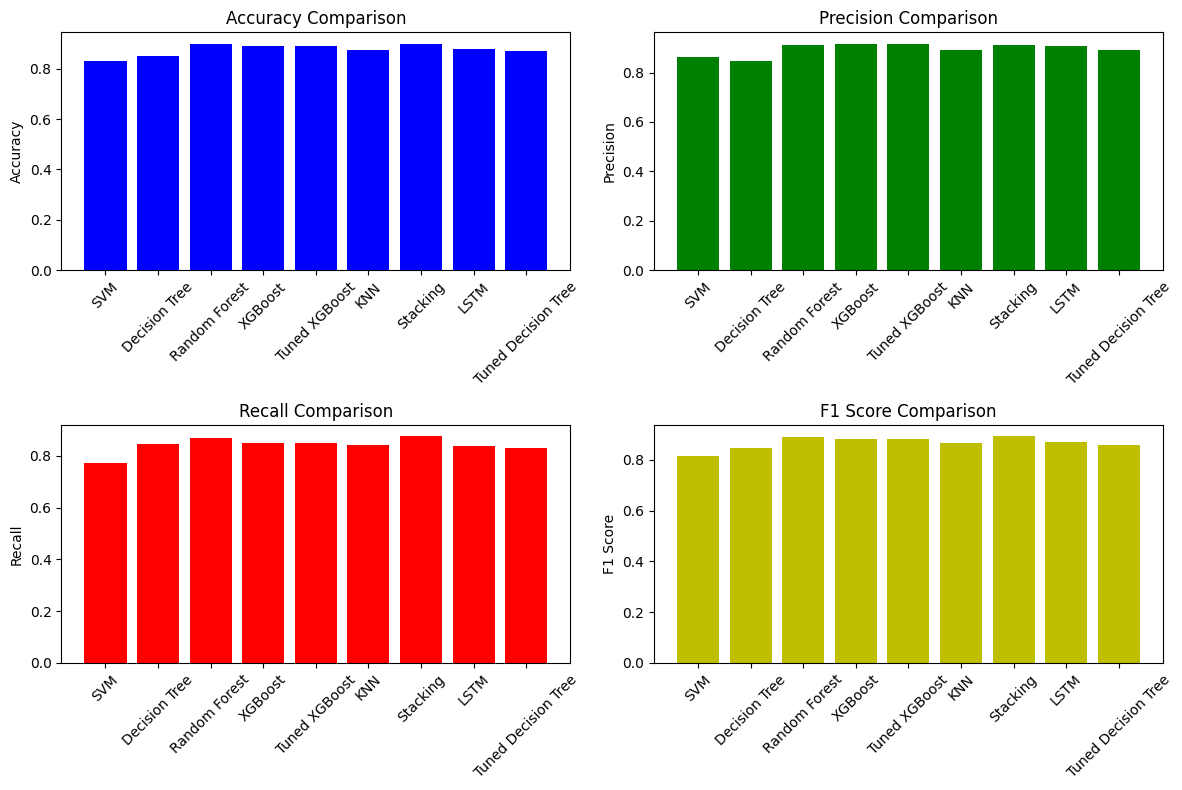

In [ ]:
# Plotting the metrics
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.bar(df_metrics['Model'], df_metrics['Accuracy'], color='b')
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)


# Precision plot
plt.subplot(2, 2, 2)
plt.bar(df_metrics['Model'], df_metrics['Precision'], color='g')
plt.title('Precision Comparison')
plt.ylabel('Precision')
plt.xticks(rotation=45)


# Recall plot
plt.subplot(2, 2, 3)
plt.bar(df_metrics['Model'], df_metrics['Recall'], color='r')
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.xticks(rotation=45)


# F1 Score plot
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th plot
plt.bar(df_metrics['Model'], df_metrics['F1 Score'], color='y')
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')  # Set y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()  # Adjust the layout to prevent overlapping

#

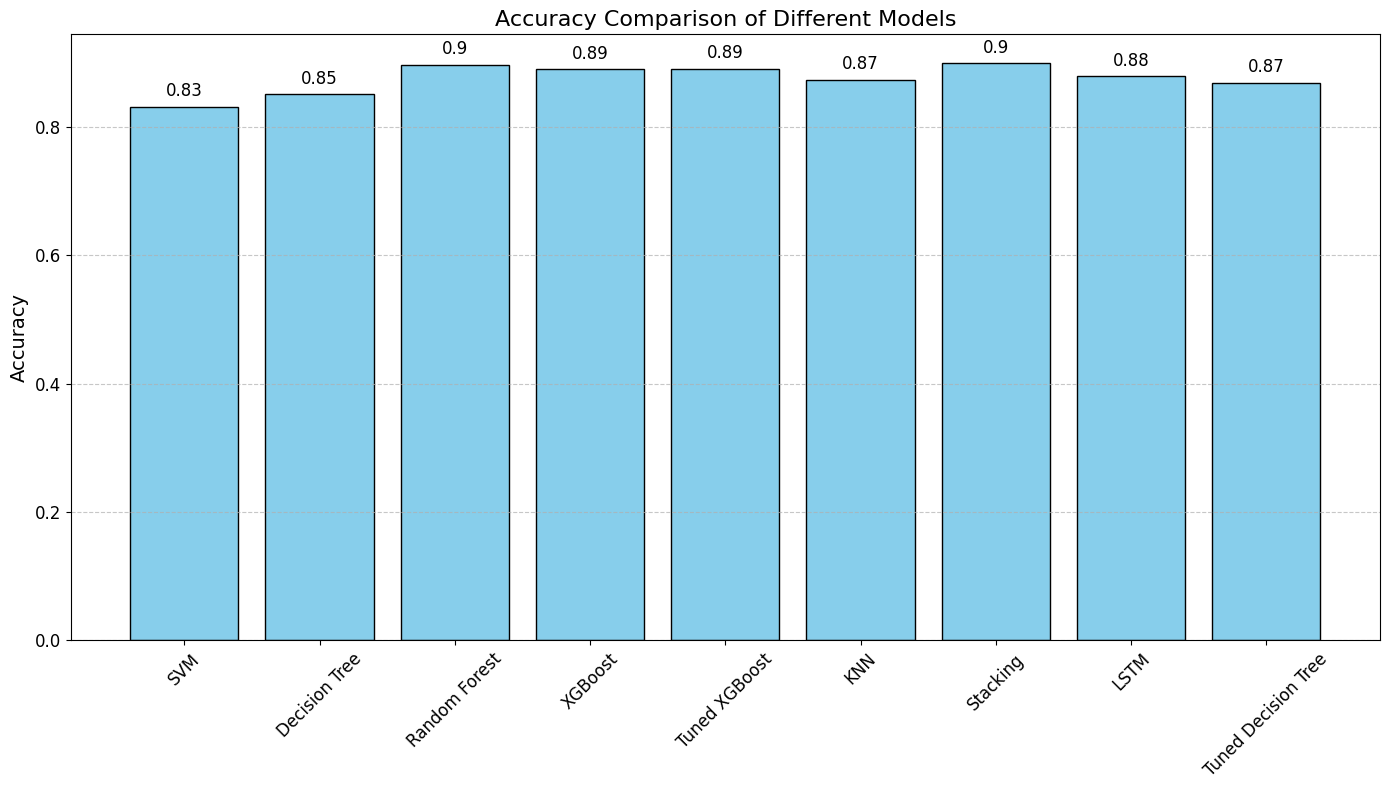

In [ ]:
plt.figure(figsize=(14, 8))

# Create the bar plot for accuracy
bars = plt.bar(df_metrics['Model'], df_metrics['Accuracy'], color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Accuracy Comparison of Different Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# import re
# import requests
# import numpy as np
# from urllib.parse import urlparse
# from bs4 import BeautifulSoup
# from collections import Counter

# def calculate_entropy(string):
#     """Calculate the entropy of a string."""
#     p, lns = Counter(string), float(len(string))
#     return -sum(count / lns * np.log2(count / lns) for count in p.values())

# def extract_features(url):
#     features = {}

#     # URL Parsing
#     parsed_url = urlparse(url)
#     domain = parsed_url.netloc

#     # URL Length
#     features['url_length'] = len(url)

#     # URL Character Counts
#     features['number_of_dots_in_url'] = url.count('.')
#     features['number_of_digits_in_url'] = sum(c.isdigit() for c in url)
#     features['number_of_hyphens_in_url'] = url.count('-')
#     features['number_of_underline_in_url'] = url.count('_')
#     features['number_of_slash_in_url'] = url.count('/')
#     features['number_of_special_char_in_url'] = sum(not c.isalnum() and not c in "-._~:/?#[]@!$&'()*+,;=" for c in url)
#     features['number_of_questionmark_in_url'] = url.count('?')
#     features['number_of_equal_in_url'] = url.count('=')
#     features['number_of_at_in_url'] = url.count('@')
#     features['number_of_dollar_in_url'] = url.count('$')
#     features['number_of_exclamation_in_url'] = url.count('!')
#     features['number_of_hashtag_in_url'] = url.count('#')
#     features['number_of_percent_in_url'] = url.count('%')

#     # URL Repeated Digits
#     repeated_digits_in_url = re.findall(r'(\d)\1+', url)
#     features['having_repeated_digits_in_url'] = 1 if repeated_digits_in_url else 0

#     # Domain Features
#     features['domain_length'] = len(domain)
#     features['number_of_dots_in_domain'] = domain.count('.')
#     features['number_of_hyphens_in_domain'] = domain.count('-')
#     features['having_digits_in_domain'] = 1 if re.search(r'\d', domain) else 0
#     features['number_of_digits_in_domain'] = sum(c.isdigit() for c in domain)

#     # Domain Repeated Digits
#     repeated_digits_in_domain = re.findall(r'(\d)\1+', domain)
#     features['having_repeated_digits_in_domain'] = 1 if repeated_digits_in_domain else 0

#     # Subdomain Features
#     subdomains = domain.split('.')[:-2]
#     features['average_subdomain_length'] = np.mean([len(sub) for sub in subdomains]) if subdomains else 0
#     subdomain_string = ''.join(subdomains)
#     features['having_digits_in_subdomain'] = 1 if re.search(r'\d', subdomain_string) else 0
#     features['number_of_digits_in_subdomain'] = sum(c.isdigit() for c in subdomain_string)

#     # URL Query and Fragment
#     features['having_query'] = 1 if parsed_url.query else 0
#     features['having_fragment'] = 1 if parsed_url.fragment else 0

#     # URL Anchor
#     features['having_anchor'] = 1 if '#' in url else 0

#     # Entropy
#     features['entropy_of_url'] = calculate_entropy(url)
#     features['entropy_of_domain'] = calculate_entropy(domain)

#     return features

# # Example URL
# url = "3456tgghjjkjbfdr56yghjjbvfdse56tyuhihgrse5rtyuhj87yt6ttf"
# features = extract_features(url)
# print(features)

# # Extract features from the URL
# features = extract_features(url)

# # Convert features to DataFrame
# features_df = pd.DataFrame([features])

# # Preprocess the features (apply the same preprocessing steps as your training data)
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features_df)

# # Make predictions
# prediction = RF.predict(features_scaled)
# prediction_proba = RF.predict_proba(features_scaled)

# # Output the results
# print(f"Prediction: {'Phishing' if prediction[0] == 1 else 'Legitimate'}")
# print(f"Prediction Probabilities: {prediction_proba}")

{'url_length': 56, 'number_of_dots_in_url': 0, 'number_of_digits_in_url': 12, 'number_of_hyphens_in_url': 0, 'number_of_underline_in_url': 0, 'number_of_slash_in_url': 0, 'number_of_special_char_in_url': 0, 'number_of_questionmark_in_url': 0, 'number_of_equal_in_url': 0, 'number_of_at_in_url': 0, 'number_of_dollar_in_url': 0, 'number_of_exclamation_in_url': 0, 'number_of_hashtag_in_url': 0, 'number_of_percent_in_url': 0, 'having_repeated_digits_in_url': 0, 'domain_length': 0, 'number_of_dots_in_domain': 0, 'number_of_hyphens_in_domain': 0, 'having_digits_in_domain': 0, 'number_of_digits_in_domain': 0, 'having_repeated_digits_in_domain': 0, 'average_subdomain_length': 0, 'having_digits_in_subdomain': 0, 'number_of_digits_in_subdomain': 0, 'having_query': 0, 'having_fragment': 0, 'having_anchor': 0, 'entropy_of_url': 4.126301966925147, 'entropy_of_domain': 0}
Prediction: Legitimate
Prediction Probabilities: [[0.62 0.38]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  should set `reset=False`.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  should set `reset=False`.
